<h1><center> ST7-OSTP : TP1 </center></h1>
<h2><center> 03/02/2022 </center></h2>

## Modules

In [1]:
# Modules de base
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Module relatif à Gurobi
from gurobipy import *

## 1. Un premier Programme Linéaire

\begin{equation*}
    \begin{array}{ll}
        max & x_1 + x_2\\[2mm]
        s.t. & 
        \begin{array}{ll}
            2x_1 + x_2 & \le 14\\
            -x_1 + 2x_2 & \le 8\\
            2x_1 - x_2 & \le 10
        \end{array} \\[2mm]
        & x_1, x_2 \in \mathbb{R}+
    \end{array}
\end{equation*}

Nous dessinons le polyèdre correspondant aux solutions réalisables du programme linéaire ci-dessus et nous pouvons identifier graphiquement la solution optimale. 

<ipython-input-2-8e2ffb7fd39f>:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


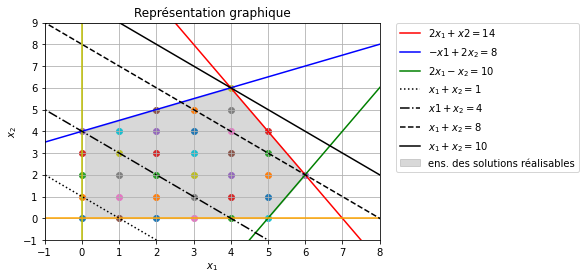

In [2]:
# -- Construction des droites associées aux contraintes --
x1s = np.linspace(-2, 50, 300)
x2s = np.linspace(-2, 50, 300)
# (C1)
x2s_C1 = 14 -2*x1s
# (C2)
x2s_C2 = 4 + 0.5*x1s
# (C3)
x2s_C3 =  -10 + 2*x1s
# Borne sur v0
x1s_bound = 0*x1s
# Borne sur v1
x2s_bound = 0*x2s


# -- Construction des droites associées à différentes valeurs de la fonction objectif --
obj1 = 1 - x1s
obj4 = 4 - x1s
obj8 = 8 - x1s
obj10 = 10 - x1s


# -- Dessin des droites associées aux contraintes --
plt.plot(x1s, x2s_C1, 'r', label = '$2x_1 + x2 = 14$')
plt.plot(x1s, x2s_C2, 'b', label = '$-x1 + 2x_2 = 8$')
plt.plot(x1s, x2s_C3, 'g', label = '$2x_1 - x_2 = 10$')
# plt.plot(x1s_bound, x1s, 'y', label = "$x_1 = 0$")
# plt.plot(x2s, x2s_bound, 'orange', label = "$x2 = 0$")
plt.plot(x1s_bound, x1s, 'y', label = "")
plt.plot(x2s, x2s_bound, 'orange', label = "")


# -- Dessin des droites associées à différentes valeurs de la fonction objectif --
plt.plot(x1s, obj1, 'k:', label = '$x_1 + x_2 = 1$')
plt.plot(x1s, obj4, 'k-.', label = '$x1 + x_2 = 4 $')
plt.plot(x1s, obj8, 'k--', label = '$x_1 + x_2 = 8$')
plt.plot(x1s, obj10, 'k', label = '$x_1 + x_2 = 10$')


# -- Dessin de la région des solutions réalisables --
limitsup = np.minimum(x2s_C1, x2s_C2)
limitinf2_3 = np.minimum(x2s_C3, x2s_C2)
limitinf = np.maximum(limitinf2_3, x2s_bound)
plt.fill_between(x1s, limitinf, limitsup, where = (x1s >= 0) & (x2s_C1 >= x2s_C3),
                 color = 'grey', alpha = 0.3, label = "ens. des solutions réalisables")
for x in range(0, 7):
    for y in range(0, 7):
        if 2*x + y <= 14 and -x + 2*y <= 8 and 2*x - y <= 10:
            plt.scatter(x, y)
            

# -- Définition des paramètres du graphique --
plt.grid()
plt.xlim((-1, 8)) 
plt.ylim((-1, 9))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('Représentation graphique')
ax = plt.axes()
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))


# -- Affichage du graphique --
plt.show()

À l'aide du solveur Gurobi, vérifier le résultat graphique trouvé précédemment.

In [3]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL1")


# -- Ajout des variables continues  --
# x1 : Var
x1 = m.addVar(vtype = GRB.CONTINUOUS, name = "x1", lb = 0)
# x2 : Var
x2 = m.addVar(vtype = GRB.CONTINUOUS, name = "x2", lb = 0)


# -- Ajout des contraintes --
# c1 : Constr
c1 = m.addConstr(2*x1 + x2 <= 14, name = "C1")
# c2 : Constr
c2 = m.addConstr(-x1 + 2*x2 <= 8, name = "C2")
# c3 : Constr
c3 = m.addConstr(2*x1 - x2 <= 10, name = "C3")


# -- Ajout de la fonction objectif --
m.setObjective(x1 + x2, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle  --
m.update()


# -- Affichage en mode texte du PL --
m.display()

Using license file /Users/mathieu/gurobi.lic
Academic license - for non-commercial use only - expires 2023-04-27
Maximize
   <gurobi.LinExpr: x1 + x2>
Subject To
   C1 : <gurobi.LinExpr: 2.0 x1 + x2> <= 14.0
   C2 : <gurobi.LinExpr: -1.0 x1 + 2.0 x2> <= 8.0
   C3 : <gurobi.LinExpr: 2.0 x1 + -1.0 x2> <= 10.0


In [4]:
# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print("La solution optimale est (x1, x2) = {} avec pour valeur de l'objectif z = {}".format((x1.x, x2.x), m.objVal))

La solution optimale est (x1, x2) = (4.0, 6.0) avec pour valeur de l'objectif z = 10.0


## 2.  Fabrication de télévisions

À l'aide du solveur Gurobi, modéliser et résoudre le PL correspondant au problème énoncé.

In [5]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL2")


# -- Ajout des variables continues comme vecteur de variables --
# V : MVar
X = m.addMVar(shape = 3, lb = 0, vtype=GRB.INTEGER)
# Mise à jour des noms des variables
X[0].VarName = "A"
X[1].VarName = "B"
X[2].VarName = "C"


# -- Ajout des contraintes comme produit matriciel --
# M : NumPy ndarray
M = np.array([ [ 3,    3.5,     5],
               [ 4,      5,     8],
               [ 1,    1.5,     3],
               [-1,      0,     0],
               [ 0,     -1,     0],
               [ 0,      0,    -1] ])
# b : NumPy ndarray
b = np.array([1800, 2400, 720, -100, -150, -75])
# C : MConstr
C = m.addConstr(M @ X <= b, name = "Cs")


# -- Ajout de la fonction objectif
# obj : NumPy ndarray
obj = np.array([160, 300, 500])
m.setObjective(obj @ X, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle  --
m.update()


# -- Affichage en mode texte du PL --
m.display()

Maximize
   <gurobi.LinExpr: 160.0 A + 300.0 B + 500.0 C>
Subject To
   Cs[0] : <gurobi.LinExpr: 3.0 A + 3.5 B + 5.0 C> <= 1800.0
   Cs[1] : <gurobi.LinExpr: 4.0 A + 5.0 B + 8.0 C> <= 2400.0
   Cs[2] : <gurobi.LinExpr: A + 1.5 B + 3.0 C> <= 720.0
   Cs[3] : <gurobi.LinExpr: -1.0 A> <= -100.0
   Cs[4] : <gurobi.LinExpr: -1.0 B> <= -150.0
   Cs[5] : <gurobi.LinExpr: -1.0 C> <= -75.0
General Integers
   ['A', 'B', 'C']


In [6]:
# -- Résolution --
m.optimize()


# -- Vérification du statut et Affichage (le cas échéant) des solutions --
if m.status == GRB.INF_OR_UNBD:
    m.setParam(GRB.Param.Presolve, 0)
    m.optimize()
if m.status == GRB.INFEASIBLE:
    print(m.display(), "\n\tN'A PAS DE SOLUTION!!!")
elif m.status == GRB.UNBOUNDED:
    print(m.display(), "\n\tEST NON BORNÉ!!!")
else:
    print(f"La solution optimale est (A, B, C) = {list(X.x)} avec pour valeur de l'objectif z = {m.objVal}")

La solution optimale est (A, B, C) = [102.0, 262.0, 75.0] avec pour valeur de l'objectif z = 132420.0


# 3. Confitures

In [7]:
# -- Initialisation du modèle --
# m : Model
m = Model("Exercice 1")


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Ajout des variables continues  --
x1 = m.addVar(vtype = GRB.CONTINUOUS, lb=0, name = f'x_1')
x2 = m.addVar(vtype = GRB.CONTINUOUS, lb=0, name = f'x_2')
x3 = m.addVar(vtype = GRB.CONTINUOUS, lb=0, name = f'x_3')


# -- Ajout des contraintes --
# - Une tonne de confiture produite
m.addConstr(x1 + x2 + x3 == 1000)
# - Au moins 35% de fruits
m.addConstr(x1 + x2 >= 350)
# - Framboise et Fraise au moins en proportion d'un quart sur les fruits total
m.addConstr(3*x1 - x2 >= 0)
m.addConstr(3*x2 - x1 >= 0)
# - Quantités de Fraises et de Framboises limitées
m.addConstr(x1 <= 200)
m.addConstr(x2 <= 200)


# -- Ajout de la fonction objectif
m.setObjective(7*x1 + 14*x2 + x3, GRB.MINIMIZE)


# -- Mise à jour du modèle  --
m.update()


# -- Affichage en mode texte du PL --
m.display()

Minimize
   <gurobi.LinExpr: 7.0 x_1 + 14.0 x_2 + x_3>
Subject To
   R0 : <gurobi.LinExpr: x_1 + x_2 + x_3> = 1000.0
   R1 : <gurobi.LinExpr: x_1 + x_2> >= 350.0
   R2 : <gurobi.LinExpr: 3.0 x_1 + -1.0 x_2> >= 0.0
   R3 : <gurobi.LinExpr: -1.0 x_1 + 3.0 x_2> >= 0.0
   R4 : <gurobi.LinExpr: x_1> <= 200.0
   R5 : <gurobi.LinExpr: x_2> <= 200.0


In [8]:
# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print(f"Prix d\'achat total optimal : {m.objVal} €")
print(f"Quantités correspondantes : {x1.x} kg de fraise, {x2.x} kg de framboise, {x3.x} kg de sucre")

Prix d'achat total optimal : 4150.0 €
Quantités correspondantes : 200.0 kg de fraise, 150.0 kg de framboise, 650.0 kg de sucre


# 4. Aide Humanitaire 

### Question  1

Nous dessinons le polyèdre correspondant aux plans d'actions réalisables décrit par :

$$
\begin{array}{ll}
    &
    %\left\{
    \begin{array}{rcrl}
         & & 5p_2 & \leq 25 \\
        p_1 & + & 3p_2 & \leq 18 \\
        6p_1 & + & 2p_2 & \leq 60  
    \end{array}  
    %\right. 
    \\[2mm]
    & p_1, ~ p_2 \in \mathbb{N}
\end{array}
$$

In [9]:
# Note :
# Dans la suite de l'exercice, nous étudions des variantes d'un problème d'optimisation.
# Afin de factoriser le code correspondant à la génération de la représentation graphique, nous créons deux fonctions: 
# la première construisant la partie récurrente de la représentation graphique, la seconde gérant l'affichage.
# De sorte que pour ajouter ce qui est propre à une variante, il suffit d'appliquer la première fonction,
# ajouter le contenu propre à la variante (nouvelle fonction objectif, etc.) puis appliquer la seconde fonction.


def build_plot_basis():
    
    # -- Construction des droites associées aux contraintes --
    p1s = np.linspace(-2, 50, 300)
    p2s = np.linspace(-2, 50, 300)
    # (C1)
    p2s_C1 = 5 +0*p1s
    # (C2)
    p2s_C2 = 6 - (1/3)*p1s
    # (C3)
    p2s_C3 = 30 -3*p1s
    # Borne sur v0
    p1s_bound = 0*p1s
    # Borne sur v1
    p2s_bound = 0*p2s
    
    # -- Dessin des droites associées aux contraintes --
    plt.plot(p1s, p2s_C1, 'r', label = '$ p_2 = 5$')
    plt.plot(p1s, p2s_C2, 'b', label = '$p_1 + 3p_2 = 18$')
    plt.plot(p1s, p2s_C3, 'g', label = '$6p_1 + 2p_2 = 60$')
    # plt.plot(p1s_bound, p1s, 'y', label = "$p_1 = 0$")
    # plt.plot(p2s, p2s_bound, 'orange', label = "$p2 = 0$")
    plt.plot(p1s_bound, p1s, 'y', label = "")
    plt.plot(p2s, p2s_bound, 'orange', label = "")

    # -- Dessin de la région des solutions réalisables --
    limitsup_1_2 = np.minimum(p2s_C1, p2s_C2)
    limitsup_1_2_3 = np.minimum(p2s_C3, limitsup_1_2)
    plt.fill_between(p1s, p1s_bound, limitsup_1_2_3, where =(p1s >= 0) & (p2s_C3 >= 0),
                     color = 'grey', alpha = 0.3, label = "ens. des plans d'action réalisables")
    for x in range(0, 11):
        for y in range(0, 6):
            if 2*y <= 25 and x + 3*y <= 18 and 6*x +2*y <= 60:
                plt.scatter(x, y, c='#7f7f7f')
                
    return p1s, p2s


def show_plot():
    
    # -- Définition des paramètres du graphique --
    plt.grid()
    plt.xlim((-1, 12)) 
    plt.ylim((-1, 8))
    plt.xlabel('$p_1$')
    plt.ylabel('$p_2$')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
    plt.title('Représentation graphique')
    ax = plt.axes()
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    
    # -- Affichage --
    plt.show()

### Question 2

L'ajout de la fonction objectif à l'ensemble des contraintes proposées précédemment donne le programme linéaire suivant :

$$
\begin{array}{cl}
    %\underset{p_1, ~ p_2}{max} 
    max
    & 2000p_1 + 3000p_2 \\[2mm]
    s.t. &
    \begin{array}{rcrl}
         & & 5p_2 & \leq 25 \\
        p_1 & + & 3p_2 & \leq 18 \\
        6p_1 & + & 2p_2 & \leq 60  
    \end{array}
    \\[2mm]
    & p_1, ~ p_2 \in \mathbb{N}
\end{array}
$$

Complétons la représentation graphique précédente avec la fonction objectif.

<ipython-input-9-f2676d4c94b1>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


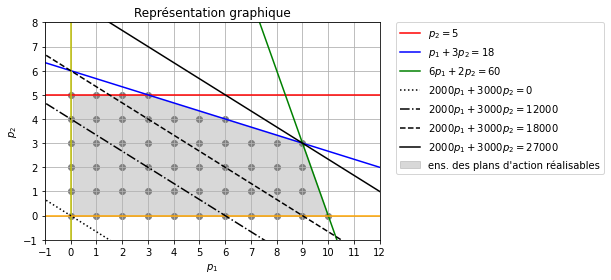

In [10]:
# -- Affichage du graphique --
p1s, p2s = build_plot_basis()


# -- Construction des droites associées à différentes valeurs de la fonction objectif --
obj0 = -(2/3)*p1s
obj12 = 4 -(2/3)*p1s
obj18 = 6 -(2/3)*p1s
obj27 = 9 -(2/3)*p1s


# -- Dessin des droites associées à différentes valeurs de la fonction objectif --
plt.plot(p1s, obj0, 'k:', label = '$2000p_1 + 3000p_2 = 0$')
plt.plot(p1s, obj12, 'k-.', label = '$2000p_1 + 3000p_2 = 12000$')
plt.plot(p1s, obj18, 'k--', label = '$2000p_1 + 3000p_2 = 18000$')
plt.plot(p1s, obj27, 'k', label = '$2000p_1 + 3000p_2 = 27000$')


show_plot()

Nous pouvons identifier la solution optimale du problème sur le graphique représenté précédemment. <br>
Vérifier ce résultat à l'aide du solveur Gurobi.

In [11]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL4-Q2")


# -- Ajout des variables continues  --
# p1 : Var
p1 = m.addVar(vtype = GRB.INTEGER, name = "p1", lb = 0)
# p2 : Var
p2 = m.addVar(vtype = GRB.INTEGER, name = "p2", lb = 0)


# -- Ajout des contraintes --
# c1 : Constr
c1 = m.addConstr(5*p2 <= 25, name = "C1")
# c2 : Constr
c2 = m.addConstr(p1 + 3*p2 <= 18, name = "C2")
# c3 : Constr
c3 = m.addConstr(6*p1 + 2*p2 <= 60, name = "C3")


# -- Ajout de la fonction objectif --
m.setObjective(2000*p1 + 3000*p2, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle  --
m.update()


# -- Affichage en mode texte du PL --
m.display()

Maximize
   <gurobi.LinExpr: 2000.0 p1 + 3000.0 p2>
Subject To
   C1 : <gurobi.LinExpr: 5.0 p2> <= 25.0
   C2 : <gurobi.LinExpr: p1 + 3.0 p2> <= 18.0
   C3 : <gurobi.LinExpr: 6.0 p1 + 2.0 p2> <= 60.0
General Integers
   ['p1', 'p2']


In [12]:
# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print(f"La solution optimale est (p1, p2) = {(p1.x, p2.x)} avec pour valeur de l'objectif z = {m.objVal}\n"
      f"dont {2000*p1.x} pour le pays 1 et {3000*p2.x} pour le pays 2")

La solution optimale est (p1, p2) = (9.0, 3.0) avec pour valeur de l'objectif z = 27000.0
dont 18000.0 pour le pays 1 et 9000.0 pour le pays 2


### Question 3 

#### Pays 1

Nous donnons ci-dessous la représentation graphique du programme linéaire pour le pays 1.

<ipython-input-9-f2676d4c94b1>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


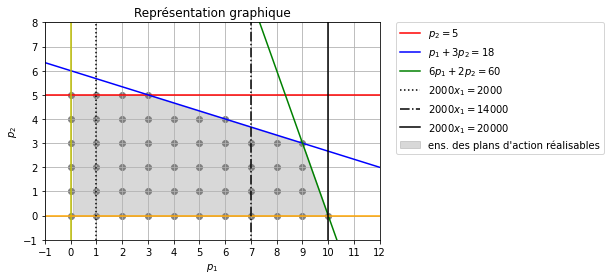

In [13]:
# -- Affichage du graphique --
p1s, p2s = build_plot_basis()


# -- Construction des droites associées à différentes valeurs de la fonction objectif --
plt.plot(1 + 0*p1s, p2s, 'k:', label = "$2000x_1 = 2000$")
plt.plot(7 + 0*p1s, p2s, 'k-.', label = "$2000x_1 = 14000$")
plt.plot(10 + 0*p1s, p2s, 'k', label = "$2000x_1 = 20000$")


show_plot()

Nous pouvons identifier la solution optimale du problème sur le graphique représenté précédemment. <br>
Vérifier ce résultat à l'aide du solveur Gurobi.

In [14]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL4-Q3.1")


# -- Ajout des variables continues  --
# p1 : Var
p1 = m.addVar(vtype = GRB.INTEGER, name = "p1", lb = 0)
# p2 : Var
p2 = m.addVar(vtype = GRB.INTEGER, name = "p2", lb = 0)


# -- Ajout des contraintes --
# c1 : Constr
c1 = m.addConstr(5*p2 <= 25, name = "C1")
# c2 : Constr
c2 = m.addConstr(p1 + 3*p2 <= 18, name = "C2")
# c3 : Constr
c3 = m.addConstr(6*p1 + 2*p2 <= 60, name = "C3")


# -- Modification de la fonction objectif --
epsilon = 0.001
m.setObjective(2000*p1 + epsilon*p2, GRB.MAXIMIZE)


# -- Mise à jour du modèle  --
m.update()


# -- Affichage en mode texte du PL --
m.display()

Maximize
   <gurobi.LinExpr: 2000.0 p1 + 0.001 p2>
Subject To
   C1 : <gurobi.LinExpr: 5.0 p2> <= 25.0
   C2 : <gurobi.LinExpr: p1 + 3.0 p2> <= 18.0
   C3 : <gurobi.LinExpr: 6.0 p1 + 2.0 p2> <= 60.0
General Integers
   ['p1', 'p2']
None


In [15]:
# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print(f"La solution optimale est (p1, p2) = {(p1.x, p2.x)}")

La solution optimale est (p1, p2) = (10.0, -0.0)


#### Pays 2

Nous donnons ci-dessous la représentation graphique du programme linéaire pour le pays 2.

<ipython-input-9-f2676d4c94b1>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


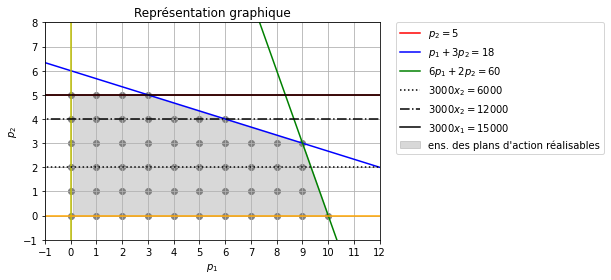

In [16]:
# -- Affichage du graphique --
p1s, p2s = build_plot_basis()


# -- Construction des droites associées à différentes valeurs de la fonction objectif --
plt.plot(p1s, 2 + 0*p1s, 'k:', label = "$3000x_2 = 6000$")
plt.plot(p1s, 4 + 0*p1s, 'k-.', label = "$3000x_2 = 12000$")
plt.plot(p1s, 5 + 0*p1s, 'k', label = "$3000x_1 = 15000$")


show_plot()

Nous pouvons identifier la solution optimale du problème sur le graphique représenté précédemment. <br>
Vérifier ce résultat à l'aide du solveur Gurobi.

In [17]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL4-Q3.2")


# -- Ajout des variables continues  --
# p1 : Var
p1 = m.addVar(vtype = GRB.INTEGER, name = "p1", lb = 0)
# p2 : Var
p2 = m.addVar(vtype = GRB.INTEGER, name = "p2", lb = 0)


# -- Ajout des contraintes --
# c1 : Constr
c1 = m.addConstr(5*p2 <= 25, name = "C1")
# c2 : Constr
c2 = m.addConstr(p1 + 3*p2 <= 18, name = "C2")
# c3 : Constr
c3 = m.addConstr(6*p1 + 2*p2 <= 60, name = "C3")


# -- Ajout de la fonction objectif --
epsilon = 0.001
m.setObjective(epsilon*p1 + 3000*p2, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle  --
m.update()


# -- Affichage en mode texte du PL --
m.display()

Maximize
   <gurobi.LinExpr: 0.001 p1 + 3000.0 p2>
Subject To
   C1 : <gurobi.LinExpr: 5.0 p2> <= 25.0
   C2 : <gurobi.LinExpr: p1 + 3.0 p2> <= 18.0
   C3 : <gurobi.LinExpr: 6.0 p1 + 2.0 p2> <= 60.0
General Integers
   ['p1', 'p2']


In [18]:
# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print(f"La solution optimale est (p1, p2) = {(p1.x, p2.x)}")

La solution optimale est (p1, p2) = (3.0, 5.0)


### Question 4

Nous donnons ci-dessous la représentation graphique du programme linéaire associé à cette question.

<ipython-input-9-f2676d4c94b1>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


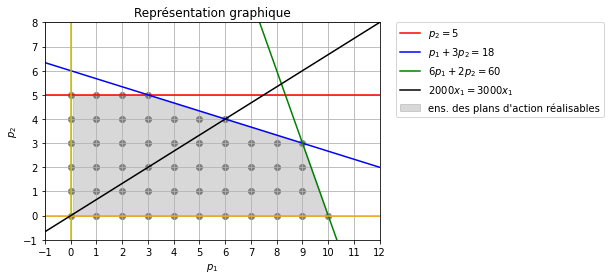

In [19]:
# -- Affichage du graphique --
p1s, p2s = build_plot_basis()


# -- Construction de droite associée à la contrainte d'égalité --
p2s_Ceq = (2/3)*p1s
plt.plot(p1s, p2s_Ceq, 'k', label = "$2000x_1 = 3000x_1$")


show_plot()

Nous pouvons identifier la solution optimale du problème sur le graphique représenté précédemment. <br>
Vérifier ce résultat à l'aide du solveur Gurobi.

In [20]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL4-Q4")


# -- Ajout des variables continues  --
# p1 : Var
p1 = m.addVar(vtype = GRB.INTEGER, name = "p1", lb = 0)
# p2 : Var
p2 = m.addVar(vtype = GRB.INTEGER, name = "p2", lb = 0)


# -- Ajout de variables intermédiaires --
# r1 : LinExpr
r1 = 5*p2
# r2 : LinExpr
r2 = p1 + 3*p2
# r3 : LinExpr
r3 = 6*p1 + 2*p2


# -- Ajout des contraintes --
# c1 : Constr
c1 = m.addConstr(r1 <= 25, name = "C1")
# c2 : Constr
c2 = m.addConstr(r2 <= 18, name = "C2")
# c3 : Constr
c3 = m.addConstr(r3 <= 60, name = "C3")
# c4 : Constr
c4 =  m.addConstr(2000*p1 == 3000*p2, name= "C4")


# -- Ajout de la fonction objectif --
m.setObjective(2000*p1 + 3000*p2, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle  --
m.update()


# -- Affichage en mode texte du PL --
m.display()

Maximize
   <gurobi.LinExpr: 2000.0 p1 + 3000.0 p2>
Subject To
   C1 : <gurobi.LinExpr: 5.0 p2> <= 25.0
   C2 : <gurobi.LinExpr: p1 + 3.0 p2> <= 18.0
   C3 : <gurobi.LinExpr: 6.0 p1 + 2.0 p2> <= 60.0
   C4 : <gurobi.LinExpr: 2000.0 p1 + -3000.0 p2> = 0.0
General Integers
   ['p1', 'p2']


In [21]:
# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print(f"La solution optimale est (p1, p2) = {(p1.x, p2.x)} avec pour valeur de l'objectif z = {m.objVal}\n"
      f"dont {2000*p1.x} pour le pays 1 et {3000*p2.x} pour le pays 2")

La solution optimale est (p1, p2) = (6.0, 4.0) avec pour valeur de l'objectif z = 24000.0
dont 12000.0 pour le pays 1 et 12000.0 pour le pays 2


### Question 5

Calculer le bilan des ressources consommées

In [22]:
print("Ressources consommées :")
print(f'{int(r1.getValue())} kits d\'équipements standards')
print(f'{int(r2.getValue())} médecins mobilisés')
print(f'{int(r3.getValue())}0000€ de dotation financière consommés')

Ressources consommées :
20 kits d'équipements standards
18 médecins mobilisés
440000€ de dotation financière consommés


### Question 6

Implémenter le nouveau programme linéaire correspondant à cette question et le résoudre avec Gurobi.

In [23]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL4-Q6")


# -- Ajout des variables continues  --
# p1 : Var
p1 = m.addVar(vtype = GRB.INTEGER, name = "p1", lb = 6)
# p2 : Var
p2 = m.addVar(vtype = GRB.INTEGER, name = "p2", lb = 4)
# x : Var
x = m.addVar(vtype = GRB.INTEGER, name = "x", lb = 0)


# -- Ajout de variables intermédiaires --
# r1 : LinExpr
r1 = 5*p2
# r2 : LinExpr
r2 = p1 + 3*p2 - x
# r3 : LinExpr
r3 = 6*p1 + 2*p2 + 2*x


# -- Ajout des contraintes --
# c1 : Constr
c1 = m.addConstr(r1 <= 25, name = "C1")
# c2 : Constr
c2 = m.addConstr(r2 <= 18, name = "C2")
# c3 : Constr
c3 = m.addConstr(r3 <= 60, name = "C3")


# -- Ajout de la fonction objectif --
m.setObjective(2000*p1 + 3000*p2, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle  --
m.update()


# -- Affichage en mode texte du PL --
m.display()

Maximize
   <gurobi.LinExpr: 2000.0 p1 + 3000.0 p2>
Subject To
   C1 : <gurobi.LinExpr: 5.0 p2> <= 25.0
   C2 : <gurobi.LinExpr: p1 + 3.0 p2 + -1.0 x> <= 18.0
   C3 : <gurobi.LinExpr: 6.0 p1 + 2.0 p2 + 2.0 x> <= 60.0
Bounds
   6.0 <= p1 <= inf
   4.0 <= p2 <= inf
General Integers
   ['p1', 'p2', 'x']


In [24]:
# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print(f"La solution optimale est (p1, p2) = {(p1.x, p2.x)} avec pour valeur de l'objectif z = {m.objVal}\n"
      f"dont {2000*p1.x} pour le pays 1 et {3000*p2.x} pour le pays 2")

La solution optimale est (p1, p2) = (7.0, 5.0) avec pour valeur de l'objectif z = 29000.0
dont 14000.0 pour le pays 1 et 15000.0 pour le pays 2


Calculer à nouveau le bilan des ressources consommées

In [25]:
# Bilan
print("Ressources consommées :")
print(f'{int(r1.getValue())} kits d\'équipements standards')
print(f'{int(r2.getValue())} médecins mobilisés + {int(x.x)} supplémentaires')
print(f'{int(r3.getValue())}0000€ de dotation consommés')

Ressources consommées :
25 kits d'équipements standards
18 médecins mobilisés + 4 supplémentaires
600000€ de dotation consommés


### Question 7

Généraliser l'implémentation de la question 6 pour différentes valeur de coût de médecin supplémentaire.

In [26]:
# Cout_med : coût d'embauche d'un médecin supplémentaire
cout_med = 1.8 # entre 1.5 et 2.5
assert 1.5 <= cout_med <= 2.5 


# -- Initialisation du modèle --
# m : Model
m = Model("PL4-Q7")


# -- Ajout des variables continues  --
# p1 : Var
p1 = m.addVar(vtype = GRB.INTEGER, name = "p1", lb = 6)
# p2 : Var
p2 = m.addVar(vtype = GRB.INTEGER, name = "p2", lb = 4)
# x : Var
x = m.addVar(vtype = GRB.INTEGER, name = "x", lb = 0)


# -- Définition de variables intermédiaires --
# r1 : LinExpr
r1 = 5*p2
# r2 : LinExpr
r2 = p1 + 3*p2 - x
# r3 : LinExpr
r3 = 6*p1 + 2*p2 + cout_med*x


# -- Ajout des contraintes --
# c1 : Constr
c1 = m.addConstr(r1 <= 25, name = "C1")
# c2 : Constr
c2 = m.addConstr(r2 <= 18, name = "C2")
# c3 : Constr
c3 = m.addConstr(r3 <= 60, name = "C3")


# -- Ajout de la fonction objectif --
m.setObjective(2000*p1 + 3000*p2, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle  --
m.update()


# -- Affichage en mode texte du PL --
m.display()

Maximize
   <gurobi.LinExpr: 2000.0 p1 + 3000.0 p2>
Subject To
   C1 : <gurobi.LinExpr: 5.0 p2> <= 25.0
   C2 : <gurobi.LinExpr: p1 + 3.0 p2 + -1.0 x> <= 18.0
   C3 : <gurobi.LinExpr: 6.0 p1 + 2.0 p2 + 1.8 x> <= 60.0
Bounds
   6.0 <= p1 <= inf
   4.0 <= p2 <= inf
General Integers
   ['p1', 'p2', 'x']


In [27]:
# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print(f"Avec un coût d'embauche de {cout_med*10}k€, la solution optimale est (p1, p2, x) = {(p1.x, p2.x, x.x)} \n"
      f"avec pour valeur de l'objectif z = {m.objVal} dont {2000*p1.x} pour le pays 1 et {3000*p2.x} pour le pays 2")

Avec un coût d'embauche de 18.0k€, la solution optimale est (p1, p2, x) = (7.0, 5.0, 4.0) 
avec pour valeur de l'objectif z = 29000.0 dont 14000.0 pour le pays 1 et 15000.0 pour le pays 2


# 5. Media Planning

### Question 1

Implémenter un $\texttt{Model}$ (de la bibliothèque $\texttt{gurobipy}$) avec les dix variables de décision du problème.

In [38]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL5")


# -- Ajout des variables continues  --
# a : Var
a = m.addVar(vtype = GRB.CONTINUOUS, name = "a", lb = 0)
# q1, q2, q3 : Var
q1 = m.addVar(vtype = GRB.CONTINUOUS, name = "q1", lb = 0)
q2 = m.addVar(vtype = GRB.CONTINUOUS, name = "q2", lb = 0)
q3 = m.addVar(vtype = GRB.CONTINUOUS, name = "q3", lb = 0)
# h1, h2 : Var
h1 = m.addVar(vtype = GRB.CONTINUOUS, name = "h1", lb = 0)
h2 = m.addVar(vtype = GRB.CONTINUOUS, name = "h2", lb = 0)
# p1, p2 : Var
p1 = m.addVar(vtype = GRB.CONTINUOUS, name = "p1", lb = 0)
p2 = m.addVar(vtype = GRB.CONTINUOUS, name = "p2", lb = 0)
# t : Var
t = m.addVar(vtype = GRB.CONTINUOUS, name = "t", lb = 0)
# c : Var
c = m.addVar(vtype = GRB.CONTINUOUS, name = "c", lb = 0)

### Question 2

Implémenter la fonction objectif.

In [39]:
# -- Ajout de la fonction objectif --
obj = 2*a + 3*(q1 + q2 + q3 + h1 + h2) + 4*(p1 + p2) + 5*t + c
m.setObjective(obj, GRB.MAXIMIZE)


# -- Mise à jour du modèle  --
m.update()

### Question 3
#### Question 3.a)

Implémenter les trois types de contraintes correspondant à la spécification du problème.

**Contrainte de budget**

In [40]:
# -- Ajout des contraintes --
# - Budget
C_budget = (a + q1 + q2 + q3 + h1 + h2 + p1 + p2 + t + c <= 6000)
C_budget_g = m.addConstr(C_budget, name = "C_budget")


# -- Mise à jour du modèle  --
m.update()

**Contraintes de seuils min et max**

In [41]:
# -- Ajout des contraintes --
# - Seuils affichage
inf_a, sup_a = 200, 1000
C_inf_a = m.addConstr(a >= inf_a, name = "C_inf_a")
C_sup_a = m.addConstr(a <= sup_a, name = "C_sup_a")
# - Seuils presse
inf_pr, sup_pr = 300, 1500
C_inf_pr = m.addConstr(q1 + q2 + q3 + h1 + h2  >= inf_pr, name = "C_inf_pr")
C_sup_pr = m.addConstr(q1 + q2 + q3 + h1 + h2  <= sup_pr, name = "C_sup_pr")
# - Seuils internet
inf_i, sup_i = 500, 2000
C_inf_i = m.addConstr(p1 + p2 >= inf_i, name = "C_inf_i")
C_sup_i = m.addConstr(p1 + p2 <= sup_i, name = "C_sup_i")
# - Seuils télévision
inf_t, sup_t = 600, 3000
C_inf_t = m.addConstr(t >= inf_t, name = "C_inf_t")
C_sup_t = m.addConstr(t <= sup_t, name = "C_sup_t")
# - Seuils cinéma
inf_c, sup_c = 300, 600
C_inf_c = m.addConstr(c >= inf_c, name = "C_inf_c")
C_sup_c = m.addConstr(c <= sup_c, name = "C_sup_c")


# -- Mise à jour du modèle  --
m.update()

#### Question 3.b) 

Implémenter les trois types de contraintes correspondant aux règles empiriques.

**Contrainte d'ordre des sous-budgets presse**

In [42]:
# -- Ajout des contraintes --
# - Ordre des sous-budgets presse
C_ordre_Q1_Q2 = m.addConstr(q1 >= q2, name = "C_ordre_Q1_Q2")
C_ordre_Q2_Q3 = m.addConstr(q2 >= q3, name = "C_ordre_Q2_Q3")
C_ordre_H1_H2 = m.addConstr(h1 >= h2, name = "C_ordre_H1_H2")


# -- Mise à jour du modèle  --
m.update()

**Contrainte de ratio des sous-bugets quotidiens**

In [43]:
# -- Ajout des contraintes --
# - Ratio des sous-budgets quotidiens
C_ratio_Q3_Q1 = m.addConstr(q3 >= 0.5*q1, name = "C_ratio_Q3_Q1")


# -- Mise à jour du modèle  --
m.update()

**Contrainte de ratio des budgets TV presse**

In [44]:
# -- Ajout des contraintes --
# - Ratio des budgets TV presse
C_ratio_t_pr = m.addConstr(t >= 2*(q1 + q2 + q3 + h1 + h2), name = "C_ratio_t_pr")


# -- Mise à jour du modèle  --
m.update()

**Contrainte de ratio des sous-budgets internet**

In [45]:
# -- Ajout des contraintes --
# - Ratio des sous-budgets internet
C_ratio_P1_P2 = m.addConstr(p1 == 1.5*p2, name = "C_ratio_P1_P2")


# -- Mise à jour du modèle  --
m.update()

In [46]:
# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Affichage en mode texte du PL --
m.display()

Maximize
   <gurobi.LinExpr: 2.0 a + 3.0 q1 + 3.0 q2 + 3.0 q3 + 3.0 h1 + 3.0 h2 + 4.0 p1 + 4.0 p2 + 5.0 t + c>
Subject To
   C_budget : <gurobi.LinExpr: a + q1 + q2 + q3 + h1 + h2 + p1 + p2 + t + c> <= 6000.0
   C_inf_a : <gurobi.LinExpr: a> >= 200.0
   C_sup_a : <gurobi.LinExpr: a> <= 1000.0
   C_inf_pr : <gurobi.LinExpr: q1 + q2 + q3 + h1 + h2> >= 300.0
   C_sup_pr : <gurobi.LinExpr: q1 + q2 + q3 + h1 + h2> <= 1500.0
   C_inf_i : <gurobi.LinExpr: p1 + p2> >= 500.0
   C_sup_i : <gurobi.LinExpr: p1 + p2> <= 2000.0
   C_inf_t : <gurobi.LinExpr: t> >= 600.0
   C_sup_t : <gurobi.LinExpr: t> <= 3000.0
   C_inf_c : <gurobi.LinExpr: c> >= 300.0
   C_sup_c : <gurobi.LinExpr: c> <= 600.0
   C_ordre_Q1_Q2 : <gurobi.LinExpr: q1 + -1.0 q2> >= 0.0
   C_ordre_Q2_Q3 : <gurobi.LinExpr: q2 + -1.0 q3> >= 0.0
   C_ordre_H1_H2 : <gurobi.LinExpr: h1 + -1.0 h2> >= 0.0
   C_ratio_Q3_Q1 : <gurobi.LinExpr: -0.5 q1 + q3> >= 0.0
   C_ratio_t_pr : <gurobi.LinExpr: -2.0 q1 + -2.0 q2 + -2.0 q3 + -2.0 h1 + -2.0 h2 

### Question 4 

Résoudre le programme linéaire

In [47]:
# -- Résolution --
m.optimize()

# -- Affichage de la solution --
#  2*a + 3*(q1 + q2 + q3 + h1 + h2) + 4*(p1 + p2) + 5*t + c
print(f'Une solution optimale est : \na = {a.x}k€\nq1 = {q1.x}k€; q2 = {q2.x}k€; q3 = {q3.x}k€; h1 = {h1.x}k€; h2 = {h2.x}k€')
print(f'p1 = {round(p1.x, 1)}k€; p2 = {round(p2.x, 1)}k€\nt = {t.x}k€\nc = {c.x}k€')
print(f'Pour une efficacité maximale de : {m.objVal / 1000}%')

Une solution optimale est : 
a = 200.0k€
q1 = 166.66666666666666k€; q2 = 166.66666666666666k€; q3 = 166.66666666666666k€; h1 = 0.0k€; h2 = 0.0k€
p1 = 1200.0k€; p2 = 800.0k€
t = 3000.0k€
c = 300.0k€
Pour une efficacité maximale de : 25.2%
